# Renewable Energy
Data source: https://www.energy.gov.au/publications/australian-energy-update-2023
- Machine readable files: https://www.energy.gov.au/publications/australian-energy-statistics-2023-machine-readable-files

## Calendar Year Data

<Axes: xlabel='Year', ylabel='Quantity'>

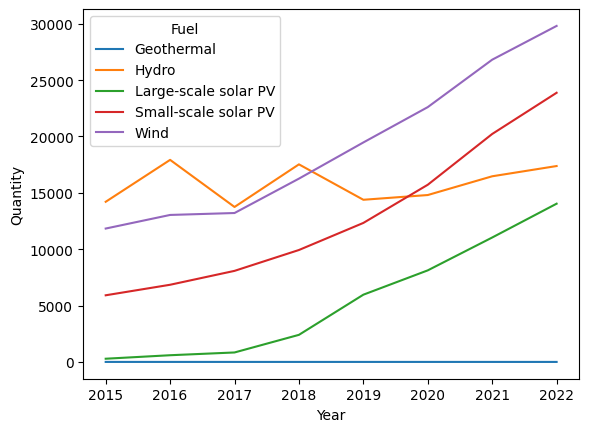

In [1]:
import pandas as pd
import seaborn as sns
from datetime import datetime
from dateutil.relativedelta import relativedelta
df = pd.read_csv('~/PycharmProjects/ZZSC9020-Group-M/data/renewable_energy/Australian Energy Statistics 2023 Table O CY - machine-readable.csv')
df = df[df['Jurisdiction'] == 'AUS']
df = df[df['Fuel'].isin(['Geothermal', 'Hydro', 'Large-scale solar PV', 'Small-scale solar PV', 'Wind'])]
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
# df['Year'] = df['Year'].apply(lambda x: int(x[:4]))
sns.lineplot(data=df, x='Year', y='Quantity', hue='Fuel')

## Financial Year Data

In [2]:
df = pd.read_csv('~/PycharmProjects/ZZSC9020-Group-M/data/renewable_energy/Australian Energy Statistics 2023 Table O FY - machine-readable.csv')
df

,Jurisdiction,Year,Fuel,Unit,Quantity
0,AUS,1989-90,"Bagasse, wood",GWh,750
1,AUS,1989-90,Biogas,GWh,NaN
2,AUS,1989-90,Black coal,GWh,87573
3,AUS,1989-90,Brown coal,GWh,33594
4,AUS,1989-90,Geothermal,GWh,NaN
...,...,...,...,...,...
1960,WA,2021-22,Small-scale solar PV,GWh,2763.104
1961,WA,2021-22,Total,GWh,44549.284
1962,WA,2021-22,Total non-renewable,GWh,37168.239
1963,WA,2021-22,Total renewable,GWh,7381.045


In [3]:
df = df[df['Jurisdiction'] == 'AUS']
df = df[df['Fuel'].isin(['Geothermal', 'Hydro', 'Large-scale solar PV', 'Small-scale solar PV', 'Wind'])]
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce') / 4
df['Year'] = df['Year'].apply(lambda x: int(x[:4]) + 1)
df['quarter'] = df['Year'].apply(lambda x: datetime(x, 1, 1))
df

,Jurisdiction,Year,Fuel,Unit,Quantity,quarter
4,AUS,1990,Geothermal,GWh,NaN,1990-01-01
5,AUS,1990,Hydro,GWh,3720.00000,1990-01-01
6,AUS,1990,Large-scale solar PV,GWh,NaN,1990-01-01
10,AUS,1990,Small-scale solar PV,GWh,NaN,1990-01-01
14,AUS,1990,Wind,GWh,NaN,1990-01-01
...,...,...,...,...,...,...
484,AUS,2022,Geothermal,GWh,NaN,2022-01-01
485,AUS,2022,Hydro,GWh,4252.72275,2022-01-01
486,AUS,2022,Large-scale solar PV,GWh,3142.29400,2022-01-01
490,AUS,2022,Small-scale solar PV,GWh,5529.36250,2022-01-01


<Axes: xlabel='Year', ylabel='Quantity'>

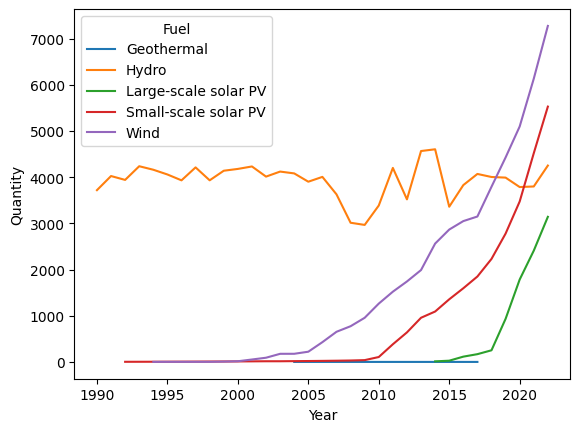

In [4]:
sns.lineplot(data=df, x='Year', y='Quantity', hue='Fuel')

In [5]:
df_quarter = pd.DataFrame({'quarter': [datetime(2010, 1, 1) + relativedelta(months=n) for n in range(0, 147, 3)]})
df_quarter

,quarter
0,2010-01-01
1,2010-04-01
2,2010-07-01
3,2010-10-01
4,2011-01-01
5,2011-04-01
6,2011-07-01
7,2011-10-01
8,2012-01-01
9,2012-04-01


In [6]:
df_re = df.pivot(index='Year', columns='Fuel', values='Quantity').reset_index()
df_re['quarter'] = df_re['Year'].apply(lambda x: datetime(x, 1, 1))
df_re = df_re.drop(['Year', 'Geothermal'], axis=1)
df_re

Fuel,Hydro,Large-scale solar PV,Small-scale solar PV,Wind,quarter
0,3720.00000,NaN,NaN,NaN,1990-01-01
1,4025.75000,NaN,NaN,NaN,1991-01-01
2,3942.00000,NaN,2.72500,NaN,1992-01-01
3,4238.25000,NaN,3.32500,NaN,1993-01-01
4,4162.25000,NaN,3.97500,1.00000,1994-01-01
5,4059.75000,NaN,4.72500,1.75000,1995-01-01
6,3932.75000,NaN,5.85000,1.75000,1996-01-01
7,4213.00000,NaN,6.95000,1.75000,1997-01-01
8,3933.25000,NaN,8.37500,2.00000,1998-01-01
9,4140.75000,NaN,9.42500,7.00000,1999-01-01


# Transformed data
We don't have quarterly information for renewable energy. So I've interpolated the values.

In [8]:
df_req = pd.merge(df_quarter, df_re, how='left', on='quarter')
df_req = df_req.interpolate(method='linear', limit_direction='forward')
df_req['total_renewable'] = df_req.sum(axis=1, numeric_only=True)
df_req.to_csv('../data/transformed/renewable_energy.csv', index=False)
df_req

,quarter,Hydro,Large-scale solar PV,Small-scale solar PV,Wind,total_renewable
0,2010-01-01,3387.175000,NaN,106.225000,1262.925000,4756.325000
1,2010-04-01,3590.800000,NaN,175.318750,1327.500000,5093.618750
2,2010-07-01,3794.425000,NaN,244.412500,1392.075000,5430.912500
3,2010-10-01,3998.050000,NaN,313.506250,1456.650000,5768.206250
4,2011-01-01,4201.675000,NaN,382.600000,1521.225000,6105.500000
5,2011-04-01,4031.462500,NaN,446.868750,1576.525000,6054.856250
6,2011-07-01,3861.250000,NaN,511.137500,1631.825000,6004.212500
7,2011-10-01,3691.037500,NaN,575.406250,1687.125000,5953.568750
8,2012-01-01,3520.825000,NaN,639.675000,1742.425000,5902.925000
9,2012-04-01,3782.468750,NaN,718.900000,1804.293750,6305.662500


<a list of 16 Line2D objects>

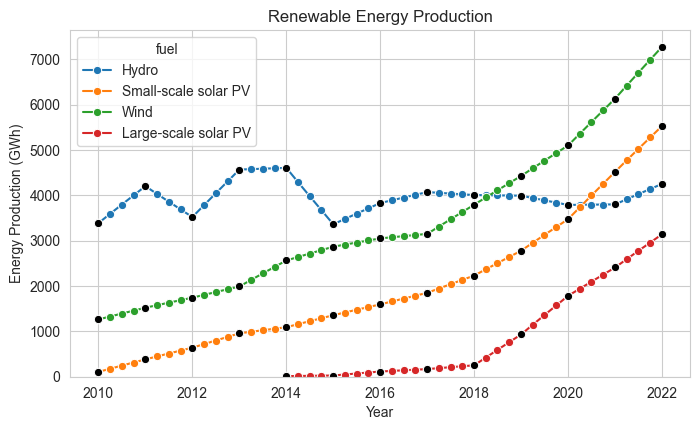

In [41]:
import matplotlib.pyplot as plt
df_long = df_req.set_index('quarter').stack().reset_index()
df_long.columns = ['quarter', 'fuel', 'quantity']
df_long
plt.figure(figsize=(8, 4.5))
sns.set_style("whitegrid")
# ax = sns.lineplot(data=df_count, x='time', y='date', hue='State')
ax = sns.lineplot(data=df_long[df_long['fuel'] != 'total_renewable'], x='quarter', y='quantity', hue='fuel', marker='o')
ax = sns.lineplot(data=df[(df['quarter'] >= datetime(2010, 1, 1)) & (df['Fuel'] != 'Geothermal')], x='quarter', legend=False, y='Quantity', palette=['k', 'k', 'k', 'k'], hue='Fuel', linestyle='', marker='o')
# lines = ax.get_lines()
# [l.set_color('black') for l in lines]
plt.ylim(ymin=0)
plt.title('Renewable Energy Production')
plt.xlabel('Year')
plt.ylabel('Energy Production (GWh)')
plt.savefig('renewable_production.png', dpi=200)
lines